# Single Object Detection

Task: Fovea Detector in eye scan image<br>
Dataset Link: <br>
Images: https://www.dropbox.com/s/mdx13ya26ut2msx/iChallenge-AMD-Training400.zip?dl=0 <br>
label csv file: (fovea_location.xlsx): https://www.dropbox.com/s/qh5leqcxwu99wwk/Annotation-DF-Training400.zip?dl=0

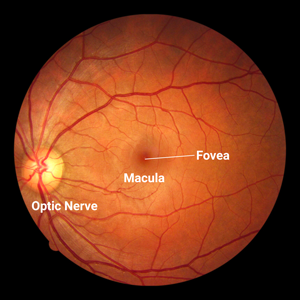

## Dataset

In [1]:
import os
import pandas as pd

File Structure: data/Training400/(AMD,NAMD,Fovea_location.xlsx)

In [2]:
path2data = "./data/"
path2labels = os.path.join(path2data,"Training400","Fovea_location.xlsx")

In [3]:
# make sure to install xlrd
labels_df=pd.read_excel(path2labels,index_col="ID")
labels_df.head()

,imgName,Fovea_X,Fovea_Y
ID,,,
1,A0001.jpg,1182.264278,1022.018842
2,A0002.jpg,967.754046,1016.946655
3,A0003.jpg,1220.206714,989.944033
4,A0004.jpg,1141.140888,1000.594955
5,A0005.jpg,1127.371832,1071.109440


In [4]:
labels_df.tail()

,imgName,Fovea_X,Fovea_Y
ID,,,
396,N0307.jpg,823.024991,690.210211
397,N0308.jpg,647.598978,795.653188
398,N0309.jpg,624.571803,755.694880
399,N0310.jpg,687.523044,830.449187
400,N0311.jpg,746.107631,759.623062


In [5]:
import seaborn as sns
%matplotlib inline

In [6]:
AorN = [imn[0] for imn in labels_df.imgName]#1st letter of img name, i.e A or N

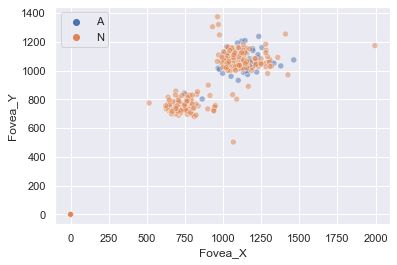

In [7]:
sns.set()
sns.scatterplot(x=labels_df['Fovea_X'],
               y = labels_df['Fovea_Y'],hue = AorN,alpha=0.5)

In [8]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

In [9]:
# fix random seed
np.random.seed(2020)

In [10]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows,ncols=2,3

<Figure size 1080x648 with 0 Axes>

In [11]:
imgName=labels_df["imgName"]
ids=labels_df.index
rndIds=np.random.choice(ids,nrows*ncols)
print(rndIds)

[353 393 324 119 196  92]


In [12]:
def load_img_label(labels_df,id_):    
    imgName=labels_df["imgName"]    
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
            
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)
    
    # centroid
    x=labels_df["Fovea_X"][id_]
    y=labels_df["Fovea_Y"][id_]
    
    label=(x,y)
    return img,label

In [13]:
def show_img_label(img,label,w_h=(50,50),thickness=2):
    w,h=w_h
    cx,cy=label
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,cy+h/2)),outline="green",width=thickness)
    plt.imshow(np.asarray(img))


(2124, 2056) (1143.80814033065, 1125.18106143292)
(1444, 1444) (670.543095822636, 784.943389053907)
(2124, 2056) (1095.58140062824, 1036.63966539598)
(2124, 2056) (1069.91893680708, 1108.41558069153)
(1444, 1444) (654.187439604162, 745.031152761605)
(2124, 2056) (1288.50377290391, 1056.7533807683)


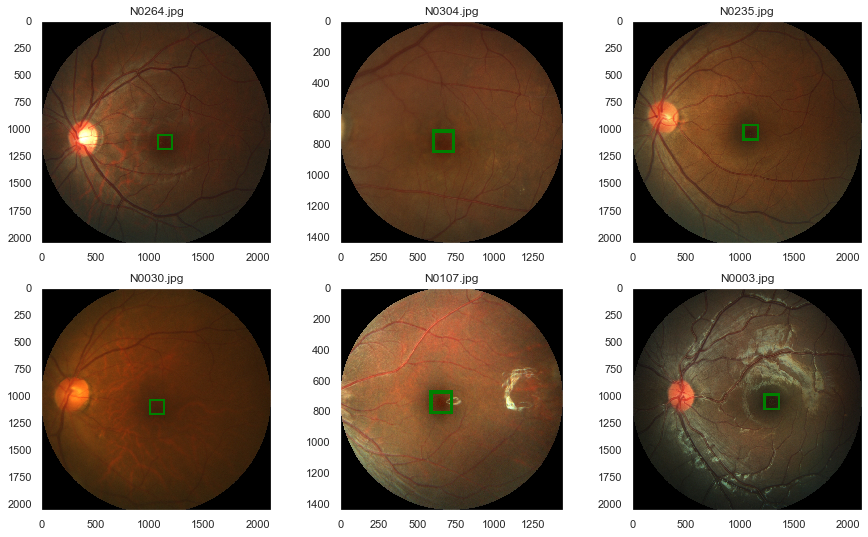

In [14]:
for i,id_ in enumerate(rndIds):
    img,label=load_img_label(labels_df,id_)
    print(img.size,label)
    plt.subplot(nrows, ncols, i+1)
    show_img_label(img,label,w_h=(150,150),thickness=20)
    plt.title(imgName[id_])
    plt.grid(False)


## Distribution of height and width of the images

In [15]:
h_list,w_list=[],[]
for id_ in ids:
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
        
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
        
    # load image
    img = Image.open(fullPath2img)
    h,w=img.size
    h_list.append(h)
    w_list.append(w)

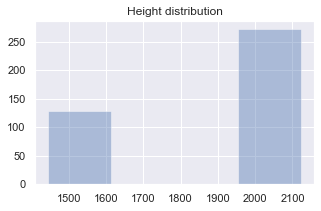

In [16]:
plt.figure(figsize=(5,3))
plt.title('Height distribution')
sns.distplot(a=h_list, kde=False)

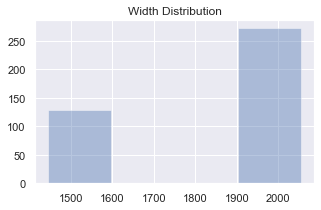

In [17]:
plt.figure(figsize=(5,3))
plt.title('Width Distribution')
sns.distplot(a=w_list, kde=False)

In object detection tasks, when we perform such transformations on images, we also needto update the labels. For instance, when we flip an image horizontally, the location ofobjects in the image will change. While torchvision.transforms provides utilityfunctions for image transformations, we need to build our own functions for updating thelabels. In this recipe, we will develop a pipeline for transforming images and labels insingle-object detection. We will develop horizontal flipping, vertical flipping, translation,and resizing. You can then add more transformations to the pipeline as you need. 

## Data Transformation for object detection

In [18]:
#First, we will define a helper function to resize images
import torchvision.transforms.functional as TF

def resize_img_label(image,label=(0.,0.),target_size=(256,256)):
    w_orig,h_orig = image.size   
    w_target,h_target = target_size
    cx, cy= label
    
    # resize image and label
    image_new = TF.resize(image,target_size)
    label_new= (cx/w_orig)*w_target, (cy/h_orig)*h_target
    
    return image_new,label_new

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)


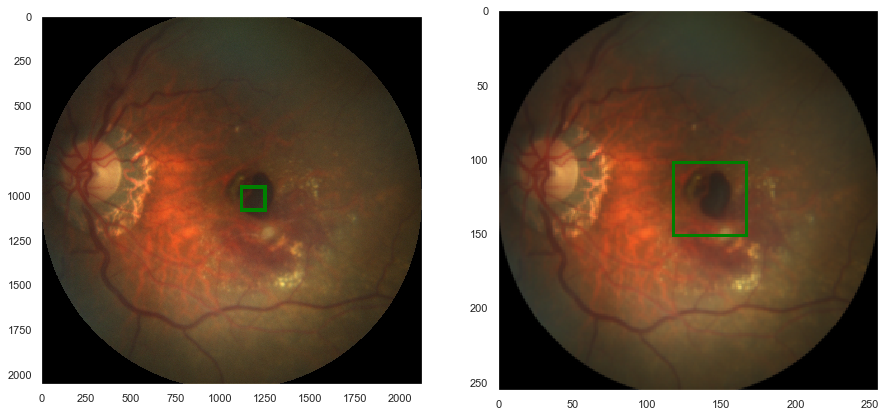

In [19]:
# load image
img, label=load_img_label(labels_df,id_=1)   
print(img.size,label)

img_r,label_r=resize_img_label(img,label)
print(img_r.size,label_r)

plt.subplot(1,2,1)
plt.grid(False)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(img_r,label_r)
plt.grid(False)

In [20]:
#Next, we will define a helper function to randomly flip images horizontally:
def random_hflip(image,label):
    w,h=image.size
    x,y=label        

    image = TF.hflip(image)
    label = w-x, y
    return image,label

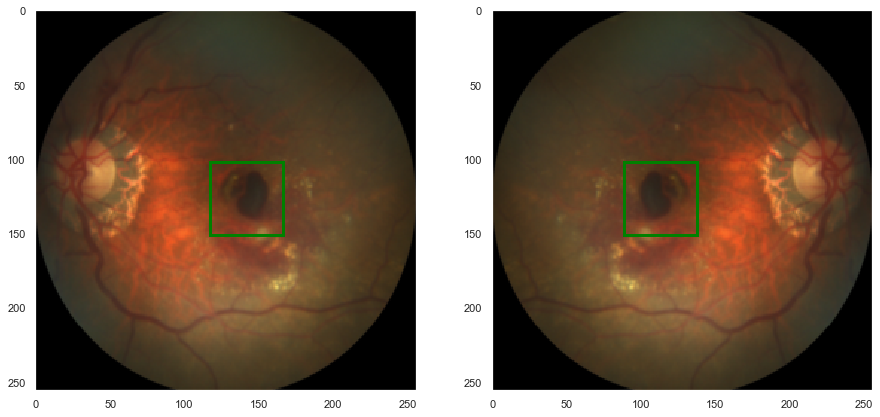

In [21]:
# load image and label
img, label=load_img_label(labels_df,1)   

# resize image and label
img_r,label_r=resize_img_label(img,label)

# horizantal flip
img_fh,label_fh=random_hflip(img_r,label_r)

plt.subplot(1,2,1)
plt.grid(False)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
plt.grid(False)
show_img_label(img_fh,label_fh)

In [22]:
#Next, we will define a function to randomly flip images vertically

def random_vflip(image,label):
    w,h=image.size
    x,y=label

    image = TF.vflip(image)
    label = x, h-y
    return image, label

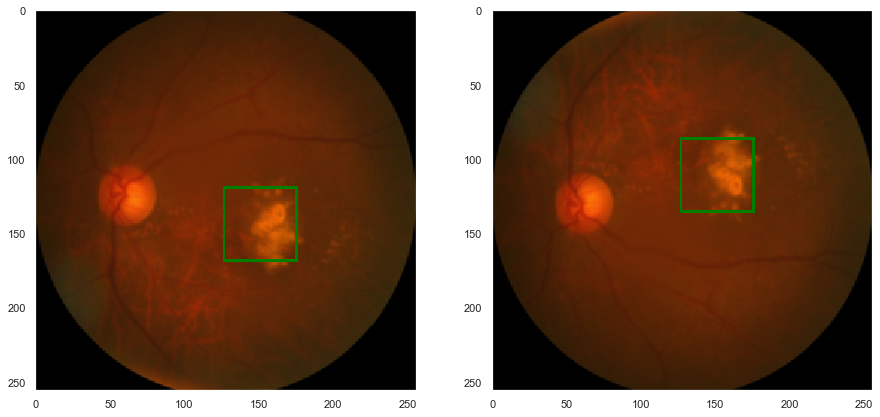

In [23]:
# load image and label
img, label=load_img_label(labels_df,7)   

# resize image and label
img_r,label_r=resize_img_label(img,label)

# vertical flip
img_fv,label_fv=random_vflip(img_r,label_r)

plt.subplot(1,2,1)
plt.grid(False)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
plt.grid(False)
show_img_label(img_fv,label_fv)

In [24]:
#Next, we will define a helper function to randomly shift or translate images in either direction
import numpy as np
np.random.seed(1)

def random_shift(image,label,max_translate=(0.2,0.2)):
    w,h=image.size
    max_t_w, max_t_h=max_translate
    cx, cy=label

    # translate coeficinet, random [-1,1]
    trans_coef=np.random.rand()*2-1 
    w_t = int(trans_coef*max_t_w*w)
    h_t = int(trans_coef*max_t_h*h)

    image=TF.affine(image,translate=(w_t, h_t),shear=0,angle=0,scale=1)
    label = cx+w_t, cy+h_t
        
    return image,label

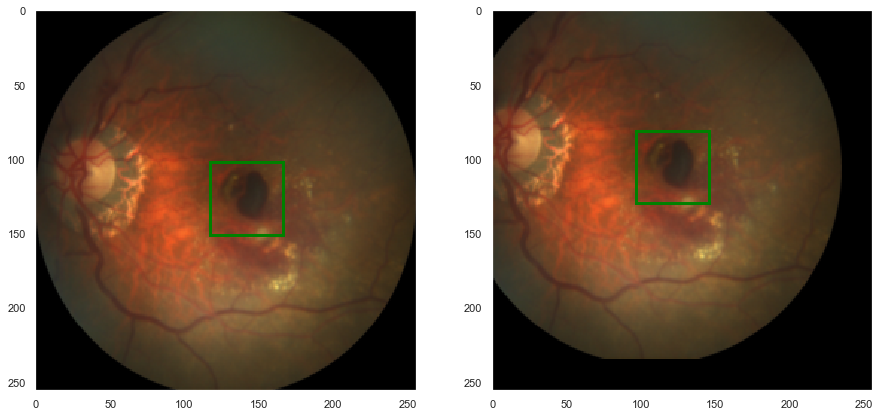

In [25]:
# load image and label
img, label=load_img_label(labels_df,1)   

# resize image and label
img_r,label_r=resize_img_label(img,label)

# horizantal flip
img_t,label_t=random_shift(img_r,label_r,max_translate=(.5,.5))

plt.subplot(1,2,1)
plt.grid(False)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
plt.grid(False)
show_img_label(img_t,label_t)

In [26]:
#Next, we will compose multiple transformations into one function to define transformer
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])
    
    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])
        
    image=TF.to_tensor(image)
    return image, label

In [27]:
import random
np.random.seed(0)
random.seed(0)

# load image and label
img, label=load_img_label(labels_df,1)   

params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0, #p=>probability value for transformation b/w 0 and 1
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.2, 0.2),
}
img_t,label_t=transformer(img,label,params)

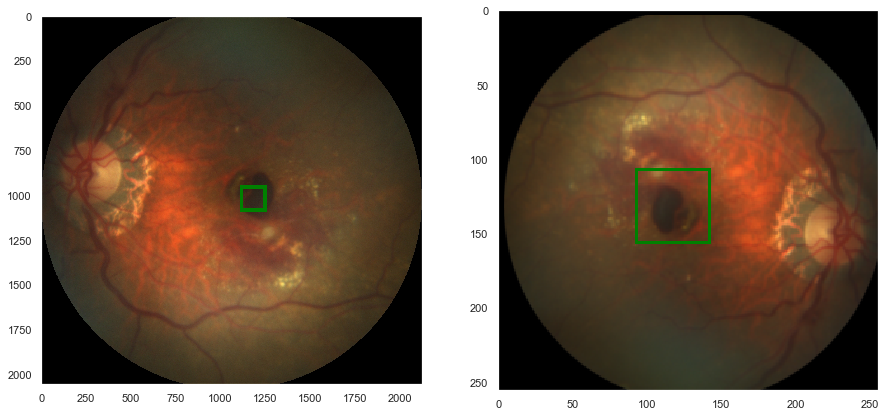

In [28]:
plt.subplot(1,2,1)
plt.grid(False)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
plt.grid(False)
show_img_label(TF.to_pil_image(img_t),label_t)

## There is More...

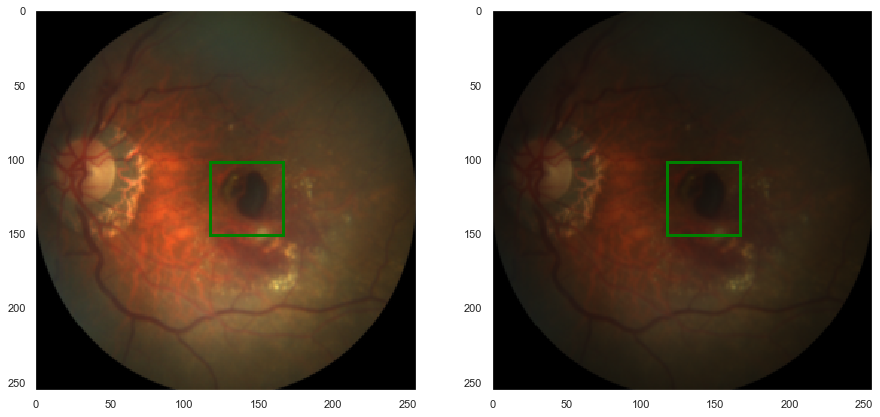

In [29]:
# load image and label
img, label=load_img_label(labels_df,id_=1)   

# resize image and label
img_r,label_r=resize_img_label(img,label)

# adjust brightness
img_t=TF.adjust_brightness(img_r,brightness_factor=0.5)
label_t=label_r

plt.subplot(1,2,1)
plt.grid(False)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
plt.grid(False)
show_img_label(img_t,label_t)

In [30]:
# contrast
img_t=TF.adjust_contrast(img_r,contrast_factor=0.4)

# gamma correction
img_t=TF.adjust_gamma(img_r,gamma=1.4)

In [31]:
def scale_label(a,b):
    div = [ai/bi for ai,bi in zip(a,b)]
    return div

In [32]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])

    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])

    if random.random() < params["p_brightness"]:
        brightness_factor=1+(np.random.rand()*2-1)*params["brightness_factor"]
        image=TF.adjust_brightness(image,brightness_factor)

    if random.random() < params["p_contrast"]:
        contrast_factor=1+(np.random.rand()*2-1)*params["contrast_factor"]
        image=TF.adjust_contrast(image,contrast_factor)

    if random.random() < params["p_gamma"]:
        gamma=1+(np.random.rand()*2-1)*params["gamma"]
        image=TF.adjust_gamma(image,gamma)

    if params["scale_label"]:
        label=scale_label(label,params["target_size"])
        
    image=TF.to_tensor(image)
    return image, label

In [33]:
np.random.seed(0)
random.seed(0)

# load image and label
img, label=load_img_label(labels_df,1)

In [34]:
params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.5, 0.5),
    "p_brightness": 1.0,
    "brightness_factor": 0.8,
    "p_contrast": 1.0,
    "contrast_factor": 0.8,
    "p_gamma": 1.0,
    "gamma": 0.4,
    "scale_label": False,
}
img_t,label_t=transformer(img,label,params)

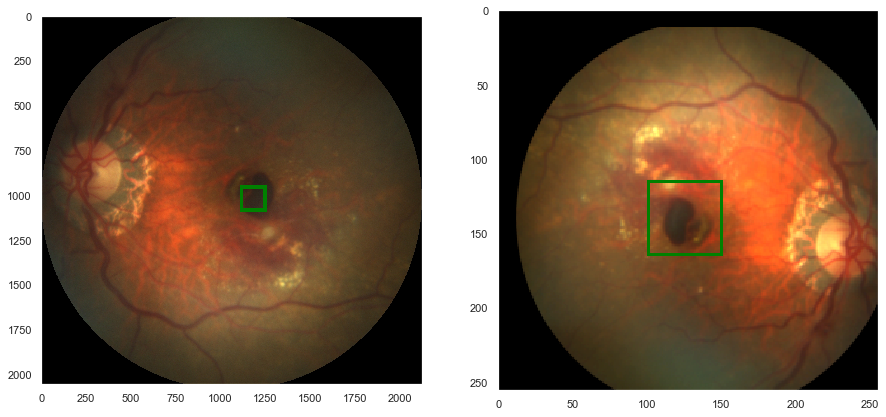

In [35]:
plt.subplot(1,2,1)
plt.grid(False)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
plt.grid(False)
show_img_label(TF.to_pil_image(img_t),label_t)

In [36]:
def rescale_label(a,b):
    div = [ai*bi for ai,bi in zip(a,b)]
    return div

# Creating custom datasets

In [37]:
from torch.utils.data import Dataset
from PIL import Image

In [38]:
class AMD_dataset(Dataset):
    def __init__(self, path2data, transform, trans_params):      
        pass    
      
    def __len__(self):
        # return size of dataset
        return len(self.labels)
      
    def __getitem__(self, idx):
        pass

In [39]:
def __init__(self, path2data, transform, trans_params):      

    # full path of the labels file
    path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")

    # read and extract labels
    labels_df=pd.read_excel(path2labels,index_col="ID")
    self.labels = labels_df[["Fovea_X","Fovea_Y"]].values#convert to numpy array

    # extract ID and imgName columns
    self.imgName=labels_df["imgName"]
    self.ids=labels_df.index

    self.fullPath2img=[0]*len(self.ids)
    for id_ in self.ids:
        if self.imgName[id_][0]=="A":
            prefix="AMD" #for folder name
        else:
            prefix="Non-AMD"
        self.fullPath2img[id_-1]=os.path.join(path2data,"Training400",prefix,self.imgName[id_])
        #                   -1 since ID starts from 1
    self.transform = transform
    self.trans_params=trans_params

In [40]:
def __getitem__(self, idx):
    # load PIL image
    image = Image.open(self.fullPath2img[idx])  
    label= self.labels[idx]

    # transform to tensor
    image,label = self.transform(image,label,self.trans_params)

    return image, label

In [41]:
AMD_dataset.__init__=__init__
AMD_dataset.__getitem__=__getitem__

In [42]:
trans_params_train={
    "target_size" : (256, 256),
    "p_hflip" : 0.5,
    "p_vflip" : 0.5,
    "p_shift" : 0.5,
    "max_translate": (0.2, 0.2),
    "p_brightness": 0.5,
    "brightness_factor": 0.2,
    "p_contrast": 0.5,
    "contrast_factor": 0.2,
    "p_gamma": 0.5,
    "gamma": 0.2,
    "scale_label": True,    
}


In [43]:
trans_params_val={
    "target_size" : (256, 256),
    "p_hflip" : 0.0,
    "p_vflip" : 0.0,
    "p_shift" : 0.0,
    "p_brightness": 0.0,
    "p_contrast": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,    
}

two instances ofthe AMD_dataset class in the first place: to have different transformations for the trainingand validation datasets. If you only define one object of the dataset class and pass differentindices, they will have the same transformation function.

In [44]:
amd_ds1=AMD_dataset(path2data,transformer,trans_params_train)
amd_ds2=AMD_dataset(path2data,transformer,trans_params_val)

In [45]:
len(amd_ds1),len(amd_ds2)

(400, 400)

## Next, we will split the dataset into training and validation sets

In [46]:
#First, we will split the image indices into two groups
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(amd_ds1))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))

320
----------
80


In [47]:
from torch.utils.data import Subset #Subset of a dataset at specified indices

train_ds=Subset(amd_ds1,train_index)
print(len(train_ds))

val_ds=Subset(amd_ds2,val_index)
print(len(val_ds))

320
80


In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# fix random seed
np.random.seed(0)

In [49]:
def show(img,label=None):
    npimg = img.numpy().transpose((1,2,0)) #C H W -> H W C
    plt.imshow(npimg)
    if label is not None:
        label=rescale_label(label,img.shape[1:])        
        x,y=label
        plt.plot(x,y,'b+',markersize=20) 

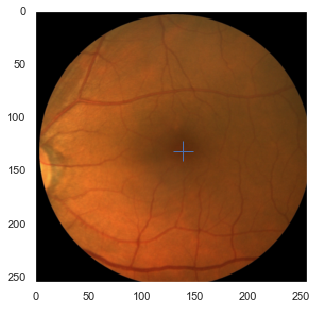

In [50]:
plt.figure(figsize=(5,5))
for img,label in train_ds:
    #print(label)
    show(img,label)
    plt.grid(False)
    break

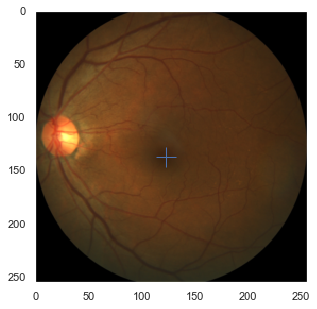

In [51]:
#Similarly, we can show a sample image from val_ds:
plt.figure(figsize=(5,5))
for img,label in val_ds:
    show(img,label)
    plt.grid(False)
    break

In [52]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)  

In [53]:
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)
    print(label_b)
    print(type(label_b))
    break

torch.Size([8, 3, 256, 256]) torch.float32
[tensor([0.6559, 0.5266, 0.3446, 0.5045, 0.6700, 0.4935, 0.5245, 0.4567],
       dtype=torch.float64), tensor([0.5639, 0.5280, 0.4877, 0.4855, 0.6112, 0.5191, 0.5278, 0.5390],
       dtype=torch.float64)]
<class 'list'>


Notice that the label batch is returned as a list. Thus, we will need to convert thelist to a tensor, as shown in the following code block

In [54]:
import torch

# extract a batch from trainin data
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)

    # convert list to tensor
    label_b=torch.stack(label_b,dim=1)
    label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

torch.Size([8, 3, 256, 256]) torch.float32
torch.Size([8, 2]) torch.float32


In [55]:
label_b

tensor([[0.6505, 0.5024],
        [0.6768, 0.6432],
        [0.5296, 0.5070],
        [0.4861, 0.4886],
        [0.7195, 0.7422],
        [0.5519, 0.4683],
        [0.3381, 0.4881],
        [0.5904, 0.4951]])

In [56]:
for img_b, label_b in val_dl:
    print(img_b.shape,img_b.dtype)

    # convert to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

torch.Size([16, 3, 256, 256]) torch.float32
torch.Size([16, 2]) torch.float32


## Creating The Model

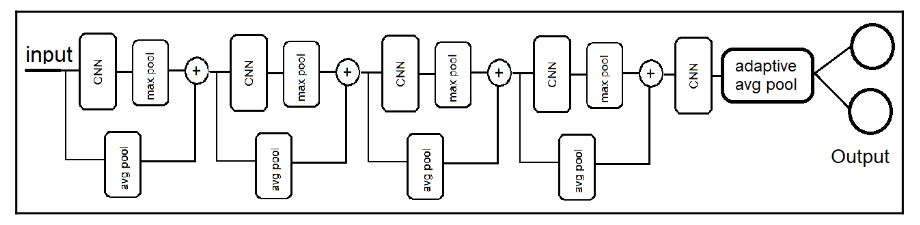

In [57]:
import torch.nn as nn
import torch.nn.functional as F

In [58]:
class Net(nn.Module):
    def __init__(self, params):
        super(Net, self).__init__()
    
    def forward(self, x):
        return x

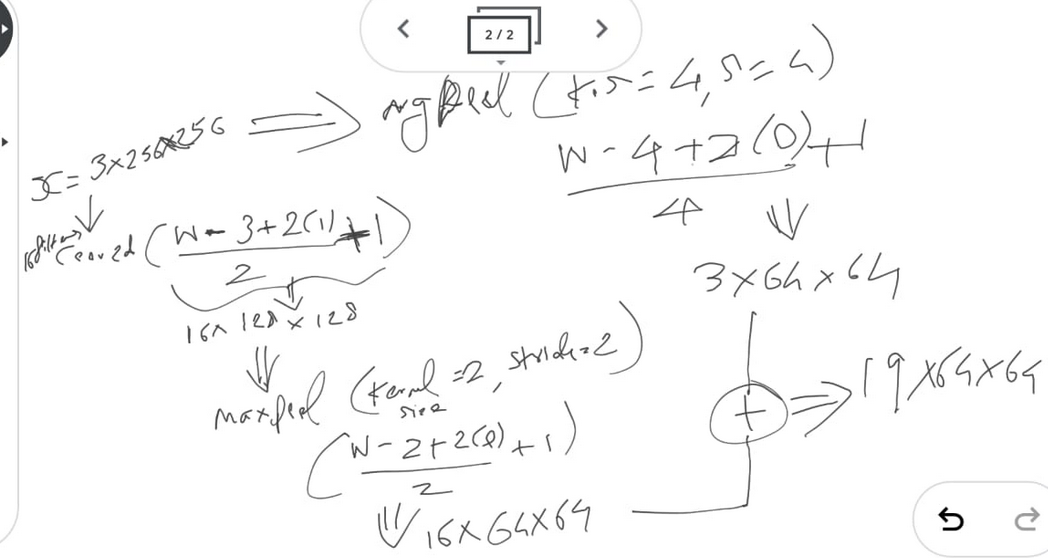

In [59]:
def __init__(self, params):
    super(Net, self).__init__()

    C_in,H_in,W_in=params["input_shape"] #(3,256,256)
    init_f=params["initial_filters"] # 16
    num_outputs=params["num_outputs"] # 2

    self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=2,padding=1)# (3x256x256->16x128x128)
    self.conv2 = nn.Conv2d(init_f+C_in, 2*init_f, kernel_size=3,stride=1,padding=1)
    self.conv3 = nn.Conv2d(3*init_f+C_in, 4*init_f, kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(7*init_f+C_in, 8*init_f, kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(15*init_f+C_in, 16*init_f, kernel_size=3,padding=1)
    self.fc1 = nn.Linear(16*init_f, num_outputs)

Check out the way skip connections are built. We used avg_pool2dto getidentity,which has the same size of x after passing throughnn.Conv2dandF.max_pool2d. We used torch.cat to concatenate x with the identity indim=1

When concatenating two tensors, they must have the same shape except inthe concatenating dimension. As a reminder, here, the tensor shape is B * C * H * W

In [60]:
def forward(self, x):
    identity=F.avg_pool2d(x,4,4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1) #64x64

    identity=F.avg_pool2d(x,2,2) #64x64->32x32
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1) #32x32

    identity=F.avg_pool2d(x,2,2) #32x32->16x16
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)# 16x16
    
    identity=F.avg_pool2d(x,2,2) #16x16->8x8
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1) #8x8

    x = F.relu(self.conv5(x)) #8x8

    x=F.adaptive_avg_pool2d(x,1) #I want output size of (1x1)
    x = x.reshape(x.size(0), -1) #flattening

    x = self.fc1(x)
    return x    

In [61]:
Net.__init__=__init__
Net.forward=forward


In [107]:
params_model={
        "input_shape": (3,256,256),
        "initial_filters": 16, 
        "num_outputs": 2,
            }

model = Net(params_model)

In [108]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    model=model.to(device) 

In [109]:
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)


# Defining Loss, Optimizer and IOU Metric

In this recipe, we will first define a loss function for our single-object detection problem.The common loss functions for detection tasks are the mean square error (MSE) andsmoothed-L1 loss. Smoothed-L1 loss uses a squared term if the absolute element-wise errorfalls below 1, and an L1 term otherwise. It is less sensitive to outliers than theMSE and, insome cases, prevents exploding gradients. We will use thesmoothed-L1loss. For more details on the smoothed-L1 loss, visit https:/​/​pytorch.​org/​docs/​stable/​nn.html#smoothl1loss.

In [90]:
loss_func = nn.SmoothL1Loss(reduction="sum") 

In [91]:
n,c=8,2
y = 0.5 * torch.ones(n, c, requires_grad=True)
print(y.shape)

target = torch.zeros(n, c, requires_grad=False)
print(target.shape)

loss = loss_func(y, target)
print(loss.item())

y = 2 * torch.ones(n, c, requires_grad=True)
target = torch.zeros(n, c, requires_grad=False)
loss = loss_func(y, target)
print(loss.item())

torch.Size([8, 2])
torch.Size([8, 2])
2.0
24.0


In [92]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)

In [93]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0003


In [94]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

In [95]:
for i in range(100):
    lr_scheduler.step(1)

Epoch    22: reducing learning rate of group 0 to 1.5000e-04.
Epoch    43: reducing learning rate of group 0 to 7.5000e-05.
Epoch    64: reducing learning rate of group 0 to 3.7500e-05.
Epoch    85: reducing learning rate of group 0 to 1.8750e-05.


Next, we will define a function to compute the IOU for a batch of data:

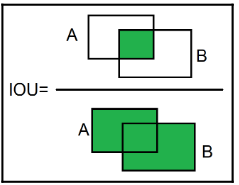

In [96]:
def cxcy2bbox(cxcy,w=50./256,h=50./256):
    # define two new tensors for w and h
    w_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*w
    h_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*h

    # extract cx and cy
    cx=cxcy[:,0].unsqueeze(1)
    cy=cxcy[:,1].unsqueeze(1)
    
    # concat cx,cy,w and h
    boxes=torch.cat((cx,cy, w_tensor, h_tensor), -1) # cx,cy,w,h
    
    return torch.cat((boxes[:, :2] - boxes[:, 2:]/2, # xmin, ymin
                     boxes[:, :2] + boxes[:, 2:]/2), 1) # xmax, ymax

In [97]:
torch.manual_seed(0)

cxcy=torch.rand(1,2)
print("center:", cxcy*256)

bb=cxcy2bbox(cxcy)
print("bounding box", bb*256)

center: tensor([[127.0417, 196.6648]])
bounding box tensor([[102.0417, 171.6648, 152.0417, 221.6648]])


In [98]:
import torchvision
def metrics_batch(output, target):
    output=cxcy2bbox(output)
    target=cxcy2bbox(target)
    
    iou=torchvision.ops.box_iou(output, target)
    return torch.diagonal(iou, 0).sum().item()

In [99]:
n,c=8,2
target = torch.rand(n, c, device=device)
target=cxcy2bbox(target)
metrics_batch(target,target)

8.0

In [100]:
def loss_batch(loss_func, output, target, opt=None):   
    # get loss 
    loss = loss_func(output, target)
    
    # get performance metric
    metric_b = metrics_batch(output,target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

In [101]:
for xb,label_b in train_dl:
    # convert to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    label_b=label_b.to(device)
 
    l,m=loss_batch(loss_func,label_b,label_b)
    print(l,m)
    break

0.0 8.0


# Training and Evaluation of the Model

In [102]:
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # convert to tensor
        yb=torch.stack(yb,1)
        yb=yb.type(torch.float32).to(device)
        
        # get model output
        output=model(xb.to(device))
        
        # get loss per batch
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        
        # update running loss
        running_loss+=loss_b
        
        # update running metric
        if metric_b is not None:
            running_metric+=metric_b

    # average loss value
    loss=running_loss/float(len_data)
    
    # average metric value
    metric=running_metric/float(len_data)
    
    return loss, metric
            

In [103]:
import copy
def train_val(model, params):
    # extract parameters
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    # history of loss values in each epoch
    loss_history={
        "train": [],
        "val": [],
    }
    
    # histroy of metric values in each epoch
    metric_history={
        "train": [],
        "val": [],
    }    
    
    
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # initialize best loss to a large value
    best_loss=float('inf')    
    
    for epoch in range(num_epochs):
        # get current learning rate
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))   

        # train the model
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        # collect loss and metric for training dataset
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        # evaluate the model
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
       
        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)   
        
        
        # store best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
            
        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts) 
            

        print("train loss: %.6f, accuracy: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, accuracy: %.2f" %(val_loss,100*val_metric))
        print("-"*10) 
        

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history        

In [110]:
loss_func=nn.SmoothL1Loss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=10,verbose=1)

path2models= "./models/"
if not os.path.exists(path2models):
        os.mkdir(path2models)

params_train={
    "num_epochs": 50,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"weights_smoothl1.pt",
}

# train and validate the model
model,loss_hist,metric_hist=train_val(model,params_train)

Epoch 0/49, current lr=0.0001
Copied best model weights!
train loss: 0.049724, accuracy: 17.81
val loss: 0.014860, accuracy: 34.85
----------
Epoch 1/49, current lr=0.0001
Copied best model weights!
train loss: 0.013461, accuracy: 30.64
val loss: 0.011356, accuracy: 46.35
----------
Epoch 2/49, current lr=0.0001
Copied best model weights!
train loss: 0.010500, accuracy: 36.78
val loss: 0.010196, accuracy: 55.17
----------
Epoch 3/49, current lr=0.0001
Copied best model weights!
train loss: 0.009416, accuracy: 38.95
val loss: 0.009630, accuracy: 51.34
----------
Epoch 4/49, current lr=0.0001
train loss: 0.008064, accuracy: 40.63
val loss: 0.013315, accuracy: 22.29
----------
Epoch 5/49, current lr=0.0001
Copied best model weights!
train loss: 0.007917, accuracy: 38.67
val loss: 0.009554, accuracy: 50.44
----------
Epoch 6/49, current lr=0.0001
train loss: 0.006869, accuracy: 45.07
val loss: 0.009938, accuracy: 43.37
----------
Epoch 7/49, current lr=0.0001
train loss: 0.006067, accuracy

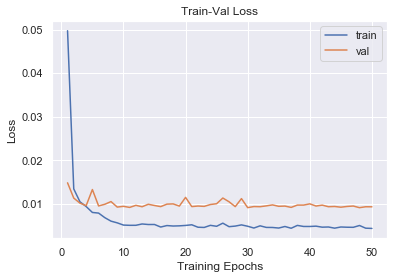

In [111]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

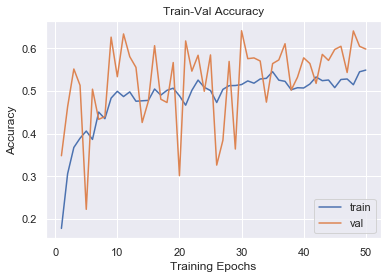

In [112]:
# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()